In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import matplotlib

In [38]:
# Custom color palette
color_azure = '#0097B2'
color_orange = '#F35000'
color_blue = '#263985'
color_red = '#B00000'
color_yellow = '#FCD116'
color_dark_grey = '#A9A9A9'
color_purple = '#9740A6'
color_light_purple = '#AA8ED6'
color_gold = '#FFD700'
color_gold_2 = '#FFA500'
color_palette = [color_azure, color_orange, color_blue, color_red, color_yellow, color_dark_grey, color_purple, color_light_purple, color_gold]

In [ ]:
# Reset font settings to matplotlib defaults to avoid font warnings
matplotlib.rcParams['font.family'] = matplotlib.rcParamsDefault['font.family']
matplotlib.rcParams['font.sans-serif'] = matplotlib.rcParamsDefault['font.sans-serif']

# Set matplotlib style - use defaults to avoid font errors
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.dpi'] = 100

In [58]:
# Read and clean data
print("Reading data...")
df = pd.read_csv('data/data.csv')
print(f"Raw data loaded: {len(df)} rows")

# Clean whitespace
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# Remove rows that are essentially empty (no Year, no MDS, no Paper title)
df = df.dropna(subset=['Year', 'MDS', 'Paper'], how='all')
# Remove duplicate rows if any
df = df.drop_duplicates()
print(f"After cleaning: {len(df)} papers\n")

Reading data...
Raw data loaded: 238 rows
After cleaning: 225 papers



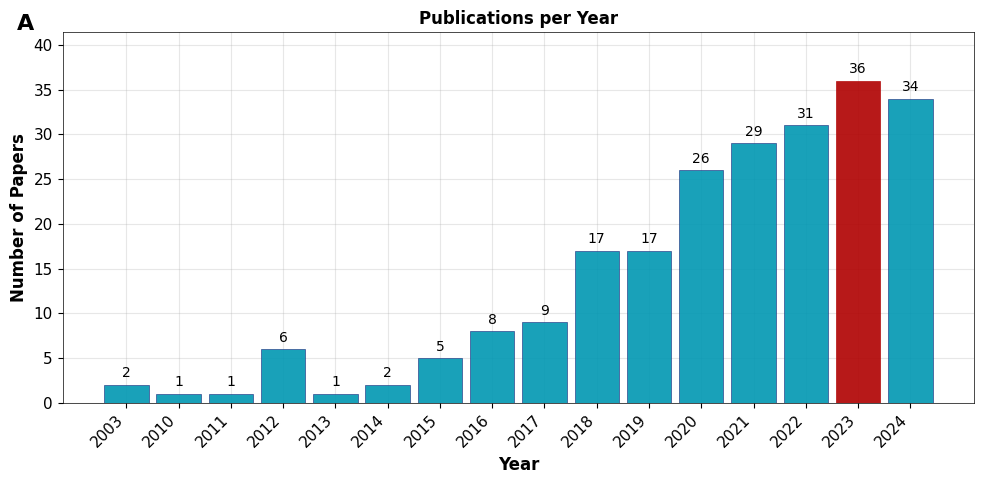

In [71]:
# Figure A: Temporal Trend
fig_a, ax = plt.subplots(figsize=(10, 5), facecolor='white')

# Get year data - only years with papers
year_data = df['Year'].dropna()
year_counts = year_data.value_counts().sort_index()

years = year_counts.index.astype(int).tolist()
counts = year_counts.values.tolist()

# print(f"Years with papers: {years}")
# print(f"Counts: {counts}")
# print(f"Total papers: {sum(counts)}\n")

# Use consecutive x positions (no gaps)
x_positions = np.arange(len(years))

# Bar plot
bars = ax.bar(x_positions, counts, color=color_azure, edgecolor=color_blue, 
              linewidth=0.5, alpha=0.9, width=0.85)

# Highlight peak year
max_count = max(counts)
max_idx = counts.index(max_count)
bars[max_idx].set_color(color_red)

# Add value labels on ALL bars
for x_pos, count in zip(x_positions, counts):
    ax.text(x_pos, count + 0.5, str(int(count)), ha='center', va='bottom', 
            fontsize=10)

# Title and labels
ax.set_title('Publications per Year', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Papers', fontsize=12)

# X-axis: show all years at consecutive positions
ax.set_xticks(x_positions)
ax.set_xticklabels([str(y) for y in years], rotation=45, ha='right')

# Set y-axis limit to prevent label clipping
ax.set_ylim(0, max_count * 1.15)

# Grid
ax.grid(True, alpha=0.3, zorder=1)
ax.set_axisbelow(True)

# Spine styling
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(0.5)

# Add panel letter
ax.text(-0.05, 1.05, 'A', transform=ax.transAxes,
        fontsize=16, fontweight='bold', va='top', ha='left')

plt.tight_layout()
plt.show()


ALL unique disorders in database: 16
Complete list:
  PD: 72
  FoG: 41
  Dyskinesia: 31
  Bradykinesia: 28
  TS: 25
  Dystonia: 9
  Ataxia: 7
  Isolated Dystonia: 5
  Ataxia (Cerebellar): 5
  Cervical Dystonia: 4
  ET: 4
  Ataxia (Multiple Sclerosis): 3
  Tremor: 2
  Ataxia (Friedreich's): 2
  Ataxia (Spinocerebellar): 1
  X-linked Dystonia: 1

Total disorder mentions: 240
(Note: This is higher than 225 papers because some papers study multiple disorders)



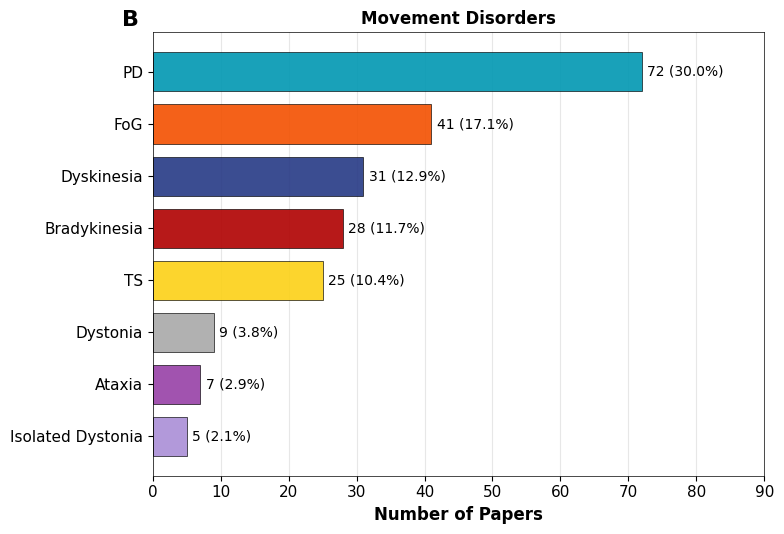

In [72]:
# Figure B: Movement Disorders
# Parse MDS column - split by comma
all_disorders = []
for mds_str in df['MDS'].dropna():
    disorders = [d.strip() for d in str(mds_str).split(',')]
    all_disorders.extend(disorders)

disorder_counts = Counter(all_disorders)

# Show ALL unique disorders found
print(f"\nALL unique disorders in database: {len(disorder_counts)}")
print("Complete list:")
for disorder, count in disorder_counts.most_common():
    print(f"  {disorder}: {count}")
print()

# Get top 8 for plotting
top_disorders = disorder_counts.most_common(8)
disorders = [d[0] for d in top_disorders]
values = [d[1] for d in top_disorders]

# Calculate percentages based on TOTAL DISORDER MENTIONS (not papers)
total_disorder_mentions = sum(disorder_counts.values())
print(f"Total disorder mentions: {total_disorder_mentions}")
print(f"(Note: This is higher than {len(df)} papers because some papers study multiple disorders)\n")

fig_b, ax = plt.subplots(figsize=(8, 5.5), facecolor='white')

# Colors
colors_disorders = [color_palette[i % len(color_palette)] for i in range(len(disorders))]

# Horizontal bars
y_pos = np.arange(len(disorders))
bars = ax.barh(y_pos, values, color=colors_disorders, 
               edgecolor='black', linewidth=0.5, alpha=0.9, height=0.75)

# Labels
ax.set_yticks(y_pos)
ax.set_yticklabels(disorders, fontsize=11)
ax.set_title('Movement Disorders', fontsize=12)
ax.set_xlabel('Number of Papers', fontsize=12)

# Value labels WITH PERCENTAGES
for i, value in enumerate(values):
    pct = (value / total_disorder_mentions) * 100
    ax.text(value + 0.8, i, f'{int(value)} ({pct:.1f}%)', va='center', ha='left',
            fontsize=10)

# Set x-axis limit to prevent label clipping
max_value = max(values)
ax.set_xlim(0, max_value * 1.25)

# Grid
ax.grid(axis='x', alpha=0.3, zorder=1)
ax.set_axisbelow(True)
ax.invert_yaxis()

# Spine styling
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(0.5)

# Add panel letter
ax.text(-0.05, 1.05, 'B', transform=ax.transAxes,
        fontsize=16, fontweight='bold', va='top', ha='left')

plt.tight_layout()
plt.show()


ALL unique data modalities in database: 72
Complete list:
  Wearable: 83
  Video: 49
  Triaxial Accelerometer: 41
  Accelerometer: 40
  Speech: 24
  IMU: 22
  Gyroscope: 21
  Triaxial Gyroscope: 17
  Clinical Data: 16
  MRI: 8
  Triaxial Magnetometer: 8
  Smartphone: 8
  VGRF: 5
  Magnetometer: 5
  EEG: 5
  Plantar Pressure: 5
  EMG: 5
  Kinect: 5
  Smartwatch: 4
  Spatio-Temporal Data: 4
  rs-fMRI: 4
  Images: 3
  Goniometer: 3
  SPECT: 3
  Anklet: 3
  Handwriting: 3
  Barometer: 2
  fMRI: 2
  Genes: 2
  Wristband: 2
  DTI: 2
  Belt: 2
  Acceleration Sensors: 2
  Plantar pressure: 2
  Neuroimaging: 2
  Bioloigcal samples: 1
  STN Neuron Model: 1
  vGRF: 1
  Telemeter: 1
  sEMG: 1
  Longitudinal Tracking: 1
  3d-Time series: 1
  Videos: 1
  Motion-Capture Suit: 1
  GAITRite: 1
  Pedoscan: 1
  EM: 1
  Orthogonal
Accelerometers: 1
  Inertial sensors: 1
  Laser System: 1
  LFP: 1
  MEG: 1
  Computer Mouse Tracking: 1
  EM Sensor: 1
  Local Field Potentials: 1
  : 1
  Serum cytokines: 1
 

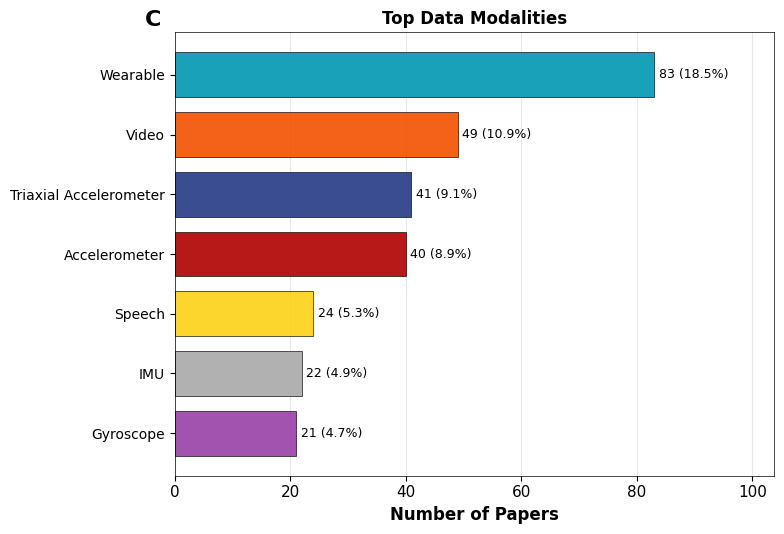

In [87]:
# Figure C: Data Modalities
# Parse Data Source Secondary - split by comma
all_sources = []
for source_str in df['Data Source Secondary'].dropna():
    sources = [s.strip() for s in str(source_str).split(',')]
    all_sources.extend(sources)

source_counts = Counter(all_sources)

# Show ALL unique data modalities found
print(f"\nALL unique data modalities in database: {len(source_counts)}")
print("Complete list:")
for source, count in source_counts.most_common():
    print(f"  {source}: {count}")
print()

# Get top 7 for plotting
top_sources = source_counts.most_common(7)
labels = [s[0] for s in top_sources]
values = [s[1] for s in top_sources]

# Calculate percentages based on TOTAL SOURCE MENTIONS (not papers)
total_source_mentions = sum(source_counts.values())

# Shorten long labels
labels_clean = []
for label in labels:
    if len(label) > 30:
        label = label[:27] + '...'
    labels_clean.append(label)

print(f"Top modalities: {list(zip(labels_clean, values))}\n")

fig_c, ax = plt.subplots(figsize=(8, 5.5), facecolor='white')

# Colors
colors_modalities = [color_palette[i % len(color_palette)] for i in range(len(labels))]

# Horizontal bars
y_pos = np.arange(len(labels_clean))
bars = ax.barh(y_pos, values, color=colors_modalities, 
               edgecolor='black', linewidth=0.5, alpha=0.9, height=0.75)

# Labels
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_clean, fontsize=10)
ax.set_title('Top Data Modalities', fontsize=12)
ax.set_xlabel('Number of Papers', fontsize=12)

# Value labels with percentages
for i, value in enumerate(values):
    pct = (value / total_source_mentions) * 100
    ax.text(value + 0.8, i, f'{int(value)} ({pct:.1f}%)', va='center', ha='left',
            fontsize=9)

# Set x-axis limit to prevent label clipping
max_value = max(values)
ax.set_xlim(0, max_value * 1.25)

# Grid
ax.grid(axis='x', alpha=0.3, zorder=1)
ax.set_axisbelow(True)
ax.invert_yaxis()

# Spine styling
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(0.5)

# Add panel letter
ax.text(-0.05, 1.05, 'C', transform=ax.transAxes,
        fontsize=16, fontweight='bold', va='top', ha='left')

plt.tight_layout()
plt.show()

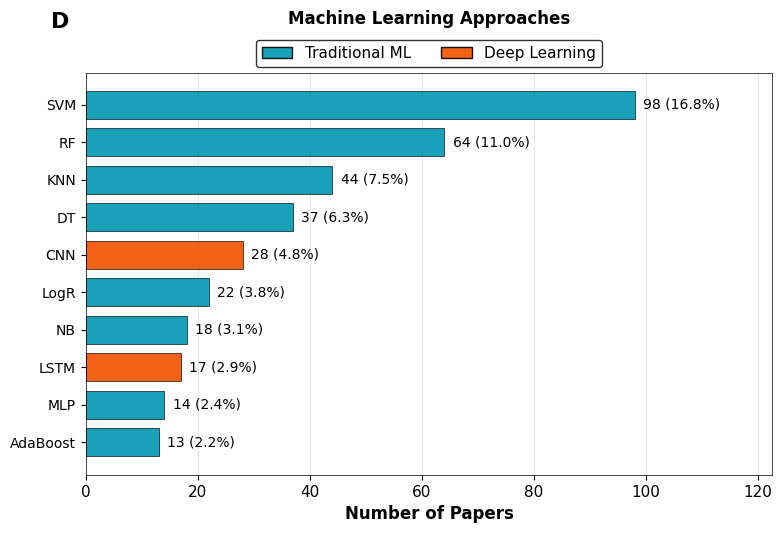

In [81]:
# Figure D: ML Algorithms
# Parse algorithms - split by comma
all_algorithms = []
for algo_str in df['Algorithm'].dropna():
    algos = [a.strip() for a in str(algo_str).split(',')]
    all_algorithms.extend(algos)

algo_counts = Counter(all_algorithms)
top_algos = algo_counts.most_common(10)
algorithms = [a[0] for a in top_algos]
counts = [a[1] for a in top_algos]

# Calculate percentages based on TOTAL ALGORITHM MENTIONS
total_algo_mentions = sum(algo_counts.values())
# print(f"Total algorithm mentions: {total_algo_mentions}")
# print(f"Top algorithms: {list(zip(algorithms, counts))}\n")

fig_d, ax = plt.subplots(figsize=(8, 5.5), facecolor='white')

# Color by Traditional ML vs Deep Learning
dl_keywords = ['CNN', 'LSTM', 'RNN', 'GRU', 'Transformer', 'ResNet', 'VGG', 'DNN', 'Deep']
colors_algo = []
for algo in algorithms:
    is_dl = any(keyword in algo for keyword in dl_keywords)
    colors_algo.append(color_orange if is_dl else color_azure)

# Horizontal bars
y_pos = np.arange(len(algorithms))
bars = ax.barh(y_pos, counts, color=colors_algo, 
               edgecolor='black', linewidth=0.5, alpha=0.9, height=0.75)

# Labels
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms, fontsize=10)
ax.set_xlabel('Number of Papers', fontsize=12)

# Value labels WITH PERCENTAGES
for i, count in enumerate(counts):
    pct = (count / total_algo_mentions) * 100
    ax.text(count + 1.5, i, f'{count} ({pct:.1f}%)', va='center', ha='left', fontsize=10)

# Set x-axis limit to prevent label clipping
max_count = max(counts)
ax.set_xlim(0, max_count * 1.25)

# Grid
ax.grid(axis='x', alpha=0.3, zorder=1)
ax.set_axisbelow(True)
ax.invert_yaxis()

# Spine styling
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(0.5)

# Add panel letter first
ax.text(-0.05, 1.15, 'D', transform=ax.transAxes,
        fontsize=16, fontweight='bold', va='top', ha='left')

# Legend - positioned between title and plot
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=color_azure, edgecolor='black', label='Traditional ML', alpha=0.9),
    Patch(facecolor=color_orange, edgecolor='black', label='Deep Learning', alpha=0.9)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.10), 
          ncol=2, fontsize=11, frameon=True, edgecolor='black')

# Title
ax.set_title('Machine Learning Approaches', fontsize=12, pad=35)

plt.tight_layout()
plt.show()

In [78]:
# Key metrics
# Calculate metrics
total_papers = len(df)
countries = df['Country'].dropna().nunique()

# Recent growth
recent_years_list = [2020, 2021, 2022, 2023, 2024]
recent_count = df[df['Year'].isin(recent_years_list)].shape[0]
recent_pct = int((recent_count / total_papers) * 100)

# Peak year
year_counts_dict = df['Year'].value_counts().to_dict()
peak_year = int(max(year_counts_dict, key=year_counts_dict.get))
peak_count = int(year_counts_dict[peak_year])

# Cross-validation
cv_count = df[(df['Cross Validation'].notna()) & (df['Cross Validation'] != 'NA')].shape[0]
cv_pct = int((cv_count / total_papers) * 100)

# Own recruitment
own_recruit = df[df['Dataset'].str.contains('Own Recruitment', na=False, case=False)].shape[0]
own_pct = int((own_recruit / total_papers) * 100)

# PD continuum
pd_keywords = ['PD', 'FoG', 'Dyskinesia', 'Bradykinesia']
pd_papers = df[df['MDS'].str.contains('|'.join(pd_keywords), na=False, case=False)].shape[0]
pd_pct = int((pd_papers / total_papers) * 100)

# Wearable
wearable_papers = df[df['Data Source Secondary'].str.contains('Wearable', na=False, case=False)].shape[0]
wearable_pct = int((wearable_papers / total_papers) * 100)

# Video
video_papers = df[df['Data Source Secondary'].str.contains('Video', na=False, case=False)].shape[0]
video_pct = int((video_papers / total_papers) * 100)

# Print formatted table
print("\n" + "="*70)
print(f"{'METRIC':<40} {'VALUE':>25}")
print("="*70)
print(f"{'Total Papers':<40} {total_papers:>25}")
print(f"{'Countries':<40} {countries:>25}")
print(f"{'Year Range':<40} {int(df['Year'].min())}-{int(df['Year'].max()):>17}")
print("-"*70)
print(f"{'Published 2020-2024':<40} {f'{recent_pct}%':>25}")
print(f"{'Peak Year':<40} {f'{peak_year} ({peak_count} papers)':>25}")
print("-"*70)
print(f"{'PD Continuum Focus':<40} {f'{pd_pct}%':>25}")
print(f"{'Wearable-Based Studies':<40} {f'{wearable_pct}%':>25}")
print(f"{'Video-Based Studies':<40} {f'{video_pct}%':>25}")
print("-"*70)
print(f"{'With Cross-Validation':<40} {f'{cv_pct}%':>25}")
print(f"{'Own Clinical Recruitment':<40} {f'{own_pct}%':>25}")
print(f"{'Median Sample Size':<40} {'63 participants':>25}")
print("="*70)


METRIC                                                       VALUE
Total Papers                                                   225
Countries                                                       33
Year Range                               2003-             2024
----------------------------------------------------------------------
Published 2020-2024                                            69%
Peak Year                                         2023 (36 papers)
----------------------------------------------------------------------
PD Continuum Focus                                             72%
Wearable-Based Studies                                         36%
Video-Based Studies                                            22%
----------------------------------------------------------------------
With Cross-Validation                                          77%
Own Clinical Recruitment                                       63%
Median Sample Size                                 6